<a href="https://colab.research.google.com/github/DDan991/12/blob/main/linear_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = torch.randn(100,1)
y = 5*x + torch.randn(100,1)

Text(0.5, 0, 'x_label')

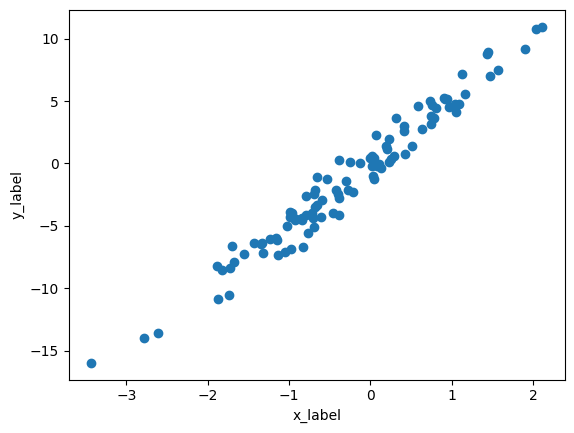

In [4]:
plt.plot(x.numpy(), y.numpy(), 'o')
plt.ylabel('y_label')
plt.xlabel('x_label')

In [5]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [6]:
model = LinearRegression(1,1)

In [10]:
def get_params(Model):
  [w , b] = Model.parameters()
  return (w[0][0].item(), b[0].item())
def plot_fit(Model, X_axis):
  w1, b1 = get_params(Model)
  x1 = np.array([X_axis.min(), X_axis.max()]) #算出x值的最大值和最小值
  y1 = w1*x1 + b1 #算出最大x和最小x的y值
  plt.plot(x1,y1, 'r') #在这两个点上画个线
  plt.scatter(x,y) #画出所有真实的点
  plt.show()

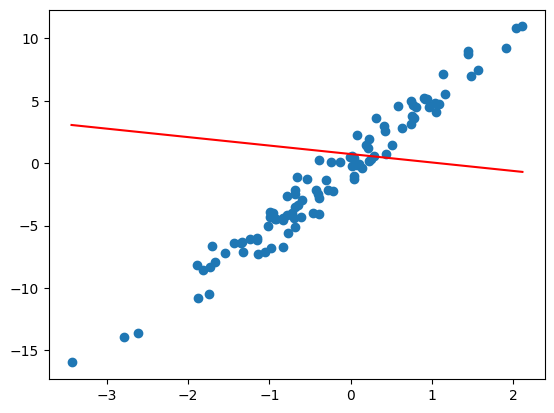

In [11]:
plot_fit(model, x)

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [15]:
epochs = 1000
losses = []
for i in range(1, epochs+1):
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  if i%100 == 0:
    print("epoch:", i, "loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 100 loss: 1.3472943305969238
epoch: 200 loss: 1.098545789718628
epoch: 300 loss: 1.0922517776489258
epoch: 400 loss: 1.0920320749282837
epoch: 500 loss: 1.0920240879058838
epoch: 600 loss: 1.0920237302780151
epoch: 700 loss: 1.0920237302780151
epoch: 800 loss: 1.0920237302780151
epoch: 900 loss: 1.0920237302780151
epoch: 1000 loss: 1.0920237302780151


5.058040142059326 0.005412358324974775


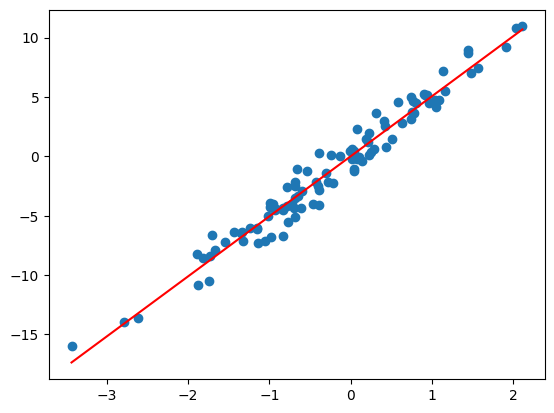

In [16]:
w1, b1 = get_params(model)
print(w1,b1)
plot_fit(model, x)